# Project-2: Sparse Representations

In this project, you will implement sparse representation algorithms for solvng the $P_{0}, P_{1}$ problem for an underdetermined setup.

## Review of Relevant concepts

Recall that we want to be able to solve the following problem which we denote by $P_{0}$:

$\left(P_{0}\right): \mathbf{x}^{\star} = \text{argmin}_{\mathbf{x}} \Vert \mathbf{x} \Vert_{0}$ s.t. $\mathbf{b} = \mathbf{A}\mathbf{x}$

where we assume that $\mathbf{b} \in \mathbb{R}^{n}, \mathbf{A} \in \mathbb{R}^{n \times m} \text{ and } \mathbf{x} \in \mathbb{R}^{m}$ with $n << m$. So, $\mathbf{x}$ is considered to be a *tall* vector with many of the entries possibly zero. Our objective therefore is to find $\mathbf{x}$ which consists of two effective parts to be found:

- The **support** of $\mathbf{x}$ defined as $\mathcal{S}_x = \lbrace i: x_i \neq 0 \rbrace $,
- The elements of $\mathbf{x}$ over $\mathcal{S}_x$, which we can refer to as $\mathbf{x}_{\mathcal{S}_x}$. 

Also, recall that the $\ell_0$ norm is equal to the cardinality of such a support set $\mathcal{S}_x$.

### Relation between $\ell_{0}$ and $\text{spark}$

**Spark**: The spark of a matrix is the **smallest** number of **linearly dependent** columns

$\text{spark}\left(\mathbf{A}\right) = \text{min}_{\mathbf{x} \in \mathbb{R}^m} \Vert \mathbf{x} \Vert_{0}$ s.t. $\mathbf{A}\mathbf{x} = \boldsymbol{0}, \mathbf{x} \neq \boldsymbol{0}$

- The non-zero vectors in the null space of $\mathbf{A}$ satisfy: $\Vert \mathbf{x} \Vert_{0} \geq \text{spark}\left(\mathbf{A}\right)$

- For $\mathbf{A}\mathbf{x} = \mathbf{b}$, the **sparsest** solution necessarily satisfies the relation $\Vert \mathbf{x} \Vert_{0} < \frac{1}{2}\text{spark}\left(\mathbf{A}\right)$

- $2 \leq \text{spark}\left(\mathbf{A}\right) \leq n + 1$

Spark helps to guarantee uniqueness of sparse solutions, but finding spark of a matrix is combinatorial problem. So, we choose to solve the $\ell_{0}$ problem via Greedy algorithms or smoothing penalty algorithms

# Greedy algorithms

**Phase transition** refers to a sudden change in the reconstruction quality from bad reconstruction quality to very good reconstruction quality, when the number of obervations $n$ is increased. 

### Orthogonal Matching Pursuit (OMP)

OMP is a greedy solution to the support-finding problem. We are assumed to be given as inputs: $\mathbf{A}$, $\mathbf{b}$ and $k_0$ (sparsity level of $\mathbf{x}$). This consists of the following parts:

1. Initialization
    - Set $k=0$ (iteration counter)
    - Set initial support set $\mathcal{S}_x^{(0)} = \phi$
    - Set initial residual to be $\mathbf{r}^{(0)} = \mathbf{b}$
    - Set error threshold $\varepsilon$

2. Repeat until either $\Vert\mathbf{r}^{(k)} \Vert_2 < \varepsilon$ or max no. of iterations is completed or $\Vert\mathbf{r}^{(k)} \Vert_2 > \Vert\mathbf{r}^{(k-1)} \Vert_2$

    - Sweep stage: Compute errors.
    
    - Update support $\mathcal{S}_x^{(k)}$
    - Update residual $\mathbf{r}^{(k)}$ 
    - Update k

3. Finally get $\hat{x} \in \mathbb{R}^N$ with $\hat{\mathbf{x}}_{\mathcal{S}_x^{(k)}} = \mathbf{A}_{\mathcal{S}_x^{(k)}}^{\dagger}\mathbf{b}$ and remaining part as zeros.

### Basis pursuit (BP)

Basis pursuit is a smoothing penalty approach to solving the $\ell_{0}$ problem. It involves using $\ell_1$ norm minimization and hence is a relaxation of $\ell_{0}$ problem. We wish to solve the following problem:

$\left(P_{1}\right): \mathbf{x}^{\star} = \text{argmin}_{\mathbf{x}} \Vert \mathbf{x} \Vert_{1}$ s.t. $\mathbf{b} = \mathbf{A}\mathbf{x}$

In the lecture, you have seen that this is a convex problem and can be implemented using linear programming (some pseduocode also given in the lecture slides). 

# Tasks

In this project, your task is to recover the sparse vector $\mathbf{x} \in \mathbb{R}^{m}$ with sparsity level $k \triangleq \Vert \mathbf{x} \Vert_0 << m$. Typically this sparsity level is somewhere between $5-10\%$. For the observation model, generate a random matrix instance $\mathbf{A} \in \mathbb{R}^{n \times m}$ and create an observation vector $\mathbf{b} = \mathbf{A}\mathbf{x}$. Then, try to reconstruct $\mathbf{x}$ from the observations $\mathbf{b}$ using:

1. Implement orthogonal matching pursuit (OMP) algorithm for reconstruction of $\mathbf{x}$ from the observations $\mathbf{b}$. 
2. Implement basis pursuit (BP) algorithm for reconstruction of $\mathbf{x}$ from the observations $\mathbf{b}$. 
3. For each case, try to show the phase transition in your results. You can try to plot a quality measure such as normalized mean squared error in dB scale vs. the ratio $\frac{n}{m}$, where $n$ represents the dimension of the observation vector and $m$ represents the dimension of the input vector $\mathbf{x}$. 
4. Compare the algorithms in terms of phase transitions and check if one of the algorithms exhibits a phase transition for a smaller value of $\frac{n}{m}$ compared to the other(s) or not.

*Optional task: Also implement another greedy algorithm (psuedocode available in lecture slides) known as subspace pursuit (SP). Analyse the phase transition.*

Some code segments and function signatures are provided. You should fill in the functions. Perform all (or as many as you can) of the tasks in this project assignment. You are going to present your work to the course responsible or one of the teaching assistants (TA) and it pays off to have a clear, well structured and brief notebook. Include an algorithmic solution and/or numerical result and/or graphs wherever asked to illustrate your results (you can do this in the notebook itself using Markdown). Your code should be functioning and easy to read.

## Libraries

You should use Python for implementation. The algorithms OMP, BP should be implemented without using dedicated library functions from `scikit-learn`. You can use: `numpy`, `scipy`, `matplotlib`, `cvxpy`. 

## Import necessary libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

print("numpy=={}".format(np.__version__))
print("cvxpy=={}".format(cp.__version__))

numpy==1.22.3
cvxpy==1.1.17


# Generate the data for testing the OMP algorithm

We seek to generate $\mathbf{x} \in \mathbb{R}^m$ having sparsity level $k_0 \triangleq \Vert \mathbf{x} \Vert_0 << m$. 

In [3]:
# Generate a vector x having sparsity level k_0 
# m is is the length of the vector x
# k0 is the the sparsity of x
def create_sparse_x(m, k0):
    x = np.zeros(m)
    x[:k0] = np.random.rand(k0)
    np.random.shuffle(x)
    return x

# Generate the observation matrix as a random matrix instance
def initialise_random_matrix(M, N):
    return np.random.rand(M,N)

# Generate the observation vector b
def create_observation_vector(A, x):
    return A@x

In [4]:
# Compute the Normalized mean squared error (NMSE) between the original x and reconstruction x_hat using OMP
def compute_NMSE(x, x_hat):
    return np.linalg.norm(x - x_hat)**2 / np.linalg.norm(x) **2

In [9]:
# Construct the reconstruction x_hat from the support set S_x_hat and the fixed observation vector A
# def construct_x_hat(x_hat_Sx, S_x_hat, A):
#     # Insert code here
#     return None

## Implementing the Orthogonal Matching Pursuit algorithm

You should use mainly `numpy` libraries

草稿

OMP is a greedy solution to the support-finding problem. We are assumed to be given as inputs: $\mathbf{A}$, $\mathbf{b}$ and $k_0$ (sparsity level of $\mathbf{x}$). This consists of the following parts:

1. Initialization
    - Set $k=0$ (iteration counter)
    - Set initial support set $\mathcal{S}_x^{(0)} = \phi$
    - Set initial residual to be $\mathbf{r}^{(0)} = \mathbf{b}$
    - Set error threshold $\varepsilon$

2. Repeat until either $\Vert\mathbf{r}^{(k)} \Vert_2 < \varepsilon$ or max no. of iterations is completed or $\Vert\mathbf{r}^{(k)} \Vert_2 > \Vert\mathbf{r}^{(k-1)} \Vert_2$

    - Sweep stage: Compute errors.
    
    - Update support $\mathcal{S}_x^{(k)}$
    - Update residual $\mathbf{r}^{(k)}$ 
    - Update k

3. Finally get $\hat{x} \in \mathbb{R}^N$ with $\hat{\mathbf{x}}_{\mathcal{S}_x^{(k)}} = \mathbf{A}_{\mathcal{S}_x^{(k)}}^{\dagger}\mathbf{b}$ and remaining part as zeros.

In [5]:
def run_OMP(A, b, k0, tol=1e-4, maxiter=100):
    # A: dictionary
    # b: observed signal
    # k0: sparsity level
    # tol: tolerence, or target error
    # maxtier: max number of interations
    if maxiter > k0:
        maxiter = k0
    
    # Initialization
    S_x_hat = []
    r = b

    ## Iterartion Loop:
    for k in range(maxiter):
        j = np.argmax(np.abs(A.T.dot(r))) # index of the highest amplitude
        S_x_hat.append(j)

        A_Sx = np.zeros(A.shape)
        for i in S_x_hat:
            A_Sx[:,i] = A[:,i]

        x = np.linalg.pinv(A_Sx) @ b
        x_hat_Sx = np.zeros(x.shape)
        for i in S_x_hat:
            x_hat_Sx[i] = x[i]

        r_old = r
        r = b - A_Sx @ x_hat_Sx

        # Error threshold
        if (np.linalg.norm(r) < tol) or (np.linalg.norm(r) > np.linalg.norm(r_old)):
            break
    
    return x_hat_Sx, S_x_hat # reconstructed sparse x from our observation
    

## Implementing the Basis pursuit algorithm

You can use the `cvxpy` package for the implementation

### Basis pursuit (BP)

Basis pursuit is a smoothing penalty approach to solving the $\ell_{0}$ problem. It involves using $\ell_1$ norm minimization and hence is a relaxation of $\ell_{0}$ problem. We wish to solve the following problem:

$\left(P_{1}\right): \mathbf{x}^{\star} = \text{argmin}_{\mathbf{x}} \Vert \mathbf{x} \Vert_{1}$ s.t. $\mathbf{b} = \mathbf{A}\mathbf{x}$

In the lecture, you have seen that this is a convex problem and can be implemented using linear programming (some pseduocode also given in the lecture slides). 

In [7]:
def run_BP(A, b, k0, tol=1e-4, maxiter=100):
    # Construct the problem.
    x = cp.Variable(A.shape[1])
    objective = cp.Minimize(cp.atoms.norm1(x))
    constraints = [b == A @ x]
    prob = cp.Problem(objective, constraints)
    # The optimal objective value is returned by `prob.solve()`.
    result = prob.solve()
    # The optimal value for x is stored in `x.value`.
    return x.value

## Plotting the NMSE vs $\frac{n}{m}$ for OMP and BP

We expect to see a **phase transition**, i.e. a sudden jump in the reconstruction quality from very bad reconstruction to a very good reconstruction quality when the number of observations $n$ is increased keeping $m$ fixed.

In [11]:
m = 200 # This is the length of the vector m. You can choose any other large value of m as well.
k0 = 8 # Usually the sparsity level is 5-10 % the value of m
x = create_sparse_x(m, k0)

In [12]:
n_arr = []
nmse_arr_OMP = []
nmse_arr_BP = []

for ni in range(1,m): # ni represents the dimension of the observation vector
    
    A = initialise_random_matrix(ni, m)
    b = create_observation_vector(A, x)
    
    # print("Running OMP")
    x_hat_Sx, S_x_hat = run_OMP(A, b, k0, tol=1e-10, maxiter=100)
    # x_hat_OMP = construct_x_hat(x_hat_Sx, S_x_hat, A)
    nmse_OMP = compute_NMSE(x=x, x_hat=x_hat_Sx)
    nmse_arr_OMP.append(nmse_OMP)
    
    # print("Running SP")
    x_hat_BP = run_BP(A, b, k0, tol=1e-10, maxiter=100)
    nmse_BP = compute_NMSE(x=x, x_hat=x_hat_BP)
    nmse_arr_BP.append(nmse_BP)
    n_arr.append(ni/m)
    
    print("n: {}, m: {}, nmse for OMP: {}, nmse for BP: {}".format(ni, m, nmse_OMP, nmse_BP))
    # print("n: {}, m: {}, k:{}, nmse for OMP: {}".format(ni, m,np.count_nonzero(x_hat_Sx), nmse_OMP))
    # print("-"*100)


n: 1, m: 200, nmse for OMP: 2.6715285067351675, nmse for BP: 2.6715284744698815
n: 2, m: 200, nmse for OMP: 1.8184330622822755, nmse for BP: 2.480773854765004
n: 3, m: 200, nmse for OMP: 2.7217609916258976, nmse for BP: 1.9489439268581
n: 4, m: 200, nmse for OMP: 3.6081659387778595, nmse for BP: 2.438537087731157
n: 5, m: 200, nmse for OMP: 2.139253785970995, nmse for BP: 1.5395066189455424
n: 6, m: 200, nmse for OMP: 2.7534897203328903, nmse for BP: 2.3225068541375524
n: 7, m: 200, nmse for OMP: 1.3974969612896193, nmse for BP: 1.0370704858269335
n: 8, m: 200, nmse for OMP: 2.4926384993996886, nmse for BP: 1.6964227524315971
n: 9, m: 200, nmse for OMP: 3.304601800863547, nmse for BP: 1.0631883307332453
n: 10, m: 200, nmse for OMP: 3.559087056884049, nmse for BP: 1.3244210671922259
n: 11, m: 200, nmse for OMP: 2.2165483613867396, nmse for BP: 0.7733010382029979
n: 12, m: 200, nmse for OMP: 3.485654199170882, nmse for BP: 0.4355892052197348
n: 13, m: 200, nmse for OMP: 3.161067332929609

### Observing the phase transition

Text(0, 0.5, 'NMSE')

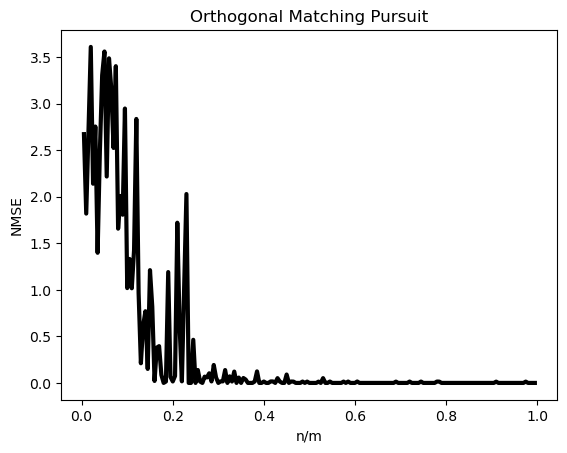

In [13]:
fig,ax=plt.subplots()
ax.plot(n_arr,nmse_arr_OMP,'k',lw=3) 
ax.set_title("Orthogonal Matching Pursuit")
ax.set_xlabel("n/m")
ax.set_ylabel("NMSE")

Text(0, 0.5, 'NMSE')

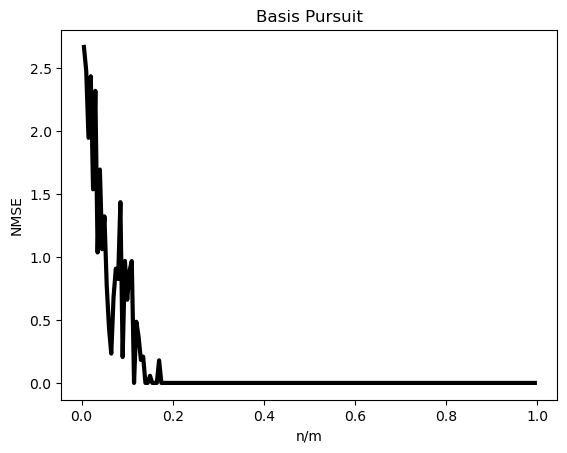

In [15]:
fig,ax=plt.subplots()
ax.plot(n_arr,nmse_arr_BP,'k',lw=3) 
ax.set_title('Basis Pursuit')
ax.set_xlabel("n/m")
ax.set_ylabel("NMSE")

In [19]:
np.where(x)

(array([  6,  27,  32,  38,  94, 166, 184, 189]),)

In [20]:
np.where(x_hat_Sx)

(array([  6,  27,  32,  38,  94, 166, 184, 189]),)

In [22]:
np.argsort(x_hat_BP)

array([ 37, 125,  42,  90, 115,  77,  10,  80, 109,  67, 170,  56, 148,
        61, 186, 139, 107, 140, 138, 124, 132, 162, 120, 130,  57, 147,
        82,  17,  92,  13, 112,  31,  50,  98,  78, 169, 188, 154,  11,
        73, 165,  81, 159,  95,  96, 119,   5, 101, 143, 192, 190,  69,
       160, 122, 163,   2,  20, 123, 145, 180, 187,  35,  33,  18, 110,
       183,  99, 131,  19, 129,  65, 193,   1,  54,  53,  16,  46,  64,
        91,  72, 126,   7,  86, 153,  74, 116, 157,  76, 111,  23, 127,
        25, 102, 142,  36, 155, 118, 158, 197, 175,  60,  71,  87,  21,
        68,  29, 178,   4,  55,  75, 108,  85,  40, 182,   9, 185, 177,
       164,  12, 117, 151,  41, 191,  63, 198,  58, 172, 149,  89,   3,
         0,  24,  30, 152, 161, 128,  70,  22, 174, 141,  43,  79,  44,
        84, 134, 133, 173,  59, 194,  39,  28, 168, 156,  45,  48,  51,
        26, 135, 171,  83,   8, 195,  97,  49, 199, 196, 105, 114, 179,
       146, 106, 104,  14,  93, 113,  88, 100,  66,  34, 121,  4